## Introduction
In this tutorial, I will go through the followning steps:

1. I will show you how to search for data sets on the web
2. I will show you how you can download the data set and read it
3. I will show you how you can clean the data set
4. I will show you how to "preprocess" the data set (that is, identify outliers and remove missing values, and make the data small in size so that I can analyse the data with a few variables)
5. I will show you how you can use simple tables and figures

These are the basic processes of "data science" type work on data sets. This is all you need to do to test your theory. After you work with these steps, you should work with your own problems and own data sets that you can download from the web. Work using R for statistical computing. 

## Instructions:

1. Download and install R (if you have already downloaded and installed R, OK)
2. Download and install Rstudio (I assume you have already downloaded and installed)
3. Install tidyverse in Rstudio (I assume that you have installed tidyverse, if you have not done so, do `install.packages("tidyverse)` in an R console to install it.
4. In Rstudio, start a new project in a new folder, and then start a new R script. 
5. Then, copy and paste the codes in this page and run them in Rstudio. Each code here is explained and annotated, so that you may want to keep the two windows stacked side by side (one window is this web page where the codes are written, and the other window is where you will run Rstudio instance). 

## How to obtain help in R if you are stuck:

1. Type `help("title of the help topic")` first.
2. Type `help.search("help topic")` if that does not work
3. Search your topic in [Google](http://www.google.com)
4. If you have an error message, copy and paste the message from Rstudio to Google
5. If you receive a see "warning", in most cases you should be fine, as the code will still run. 

## Where to obtain data?

1. Google: use your search terms and filetype:csv will fetch you search on specific topics and if they have associated csv files, then you can obtain their csv files as well. CSV stands for comma separated value files, you can also search for other types that are data associated for example, sav for spss files, or dta for stata files and so on.
2. WHO data sets: if you type "microdata" you can get links to data sets
3. To [search NZ based data, you can go here:]( https://www.health.govt.nz/nz-health-statistics/health-statistics-and-data-sets/diabetes-data-and-stats)

Once you find data sets from a website and can download the data sets, you will need to do the following:

1. Read the data set
2. Clean the data set for your analysis
3. Generate graphs and you can examine the data set 
4. Set up theories and test with data you get in the data set or set up your own theories.

For example, we have obtained a data set "diabetes.txt" and we will read the data set and we will run some visualisations and analyses.

## How to download and read data sets?
You can download data sets in csv formats (most cases and look for where they provide you with csv files). if you get excel spreadsheets, a good idea would be to read it in a spreadsheet programme and export the data as csv files. If you see other formats for example SPSS and SAS data sets use the "foreign" package (this comes directly with the R installation, so you will have to call the library by `library(foreign)` and it will work. If you use tidyverse package then do `library(haven)` after calling `library(tidyverse)`. For more information on haven library, read [haven webpage](http://haven.tidyverse.org/). Once the dataset (say the filename is "dataset.csv") is in your  folder, then do:

`mydata <- read_csv("dataset.csv")`

If it is a data set that is formatted with SPSS, then do

`mydata <- read_spss("dataset.sav")`

Read the instructions on haven website to learn more about it. If you use `foreign` package, then read the `foreign` package help site to learn more about it. 
Sometime, data sets come as simple text files. See the example below how we have read it. 

## How to work with this exercise?

Here I have shown you a few simple steps in how you can use a data set ("diabetes.txt") and run some preliminary data cleaning and visualisation exercise.  Download the data set from the filespace (or see for the data set in the "Learn" workspace) and keep the data set in the same folder where you will run your R script. Then, open your Rstudio and create a file say something like "practice.R". Then copy and paste the codes from this document to your R workspace and run. I assume that you have already installed `tidyverse` package and can work with it. 

In [ ]:
## Call the libraries
library(tidyverse) # we want to load the tidyverse package 
mydata <- read_table2("diabetes.txt") # reads tabular data
head(mydata) # examine the first six rows


In [4]:
# How many rows and how many columns?
print(dim(mydata)) # 366 rows with 15 variables each, dim = dimension
# from a description of the data, you may omit location and time.ppn
mydata1 <- mydata %>% 
            select(-c(location, time.ppn))
# we used a %>% symbol to "pipe" mydata through a selection process
# we selected "out" (that is removed) location and time.ppn
# then we stored the rest to a data set mydata1 to shorten the data

print(names(mydata1)) # returns the variable names

[1] 366  16
 [1] "chol"     "stab.glu" "hdl"      "ratio"    "glyhb"    "age"     
 [7] "gender"   "height"   "weight"   "frame"    "bp.1s"    "bp.1d"   
[13] "waist"    "hip"     


In [ ]:
# We want to find out some basic statistics
# How many males and females?

malefemale <- mydata1 %>% # we have created an object "malefemale" and this will be a data in the end
                group_by(gender) %>% # we have stored mydata there and "piped" mydata using %>% symbol
                summarize(Count = n()) %>% # n() is a function that gives you tallies of how many males/females
                mutate(Percent = round(Count * 100/sum(Count), 2)) # we have created a new variable Percent

print(malefemale)
# If we want to print fancy tables,
library(knitr) # call the package to produce formatted outputs

male.female <- kable(malefemale) # produces a markdown formatted table

# We can repeat the same analyses if we want to find out the distribution of body frames
framestats <- mydata1 %>%
                group_by(frame) %>%
                summarize(Count = n()) %>%
                mutate(Percent = round(Count * 100/sum(Count), 2))
frame.table <- kable(framestats)


In [ ]:
# Here, we are cross-tabulating body frame with gender
genframe <- mydata1 %>%
              group_by(gender, frame) %>%
              summarize(Count = n()) %>%
              spread(gender, Count) %>%
              mutate(fempct = round(female * 100/rowSums(genframe[, c(2:3)], dims = 1), 2),
                     malepct = round(male * 100 / rowSums(genframe[, c(2:3)], dims = 1), 2))

genframe1 <- cbind(genframe[,1], genframe[,2], genframe[,4], genframe[,3], genframe[,5])
frame.by.gender <- kable(genframe1)

pval.fg <- round(chisq.test(genframe[, c(2,3)])$p.value, 10) # we will store the p-values here


## Gender distribution
|gender | count| percent|
|:------|-----:|-------:|
|female |   214|   58.47|
|male   |   152|   41.53|

|frame  | female| fempct| male| malepct|
|:------|------:|------:|----:|-------:|
|large  |     38|  39.58|   58|   60.42|
|medium |    111|  64.53|   61|   35.47|
|small  |     65|  66.33|   33|   33.67|


# Next, we will generate summary measures (mean, median, standard deviation) for continuous and categorical variables
We will take mydata1, and we will find averaged glycosylated haemoglobin for male and females.

In [20]:
glyc.sex <- mydata1 %>% 
             group_by(gender) %>%
             summarize(mean.hbaic = mean(glyhb, na.rm = T),
                       sd.hbaic = sd(glyhb, na.rm = T))

##  Notes:
# glyc.sex is a data object that stores everything we do with mydata after first storing it in and piping 
# think of "mydata %>%" as "start with mydata and then ..." 

glycsex = kable(glyc.sex) # glycsex stores a pretty table format for the object glyc.sex we created in the previous code


Table 2. Glycosylated haemoglobin by sex

|Gender | Mean glycosylated Hb| Std Dev|
|:------|----------:|--------:|
|Female |   5.517804| 2.145652|
|Male   |   5.733289| 2.347489|

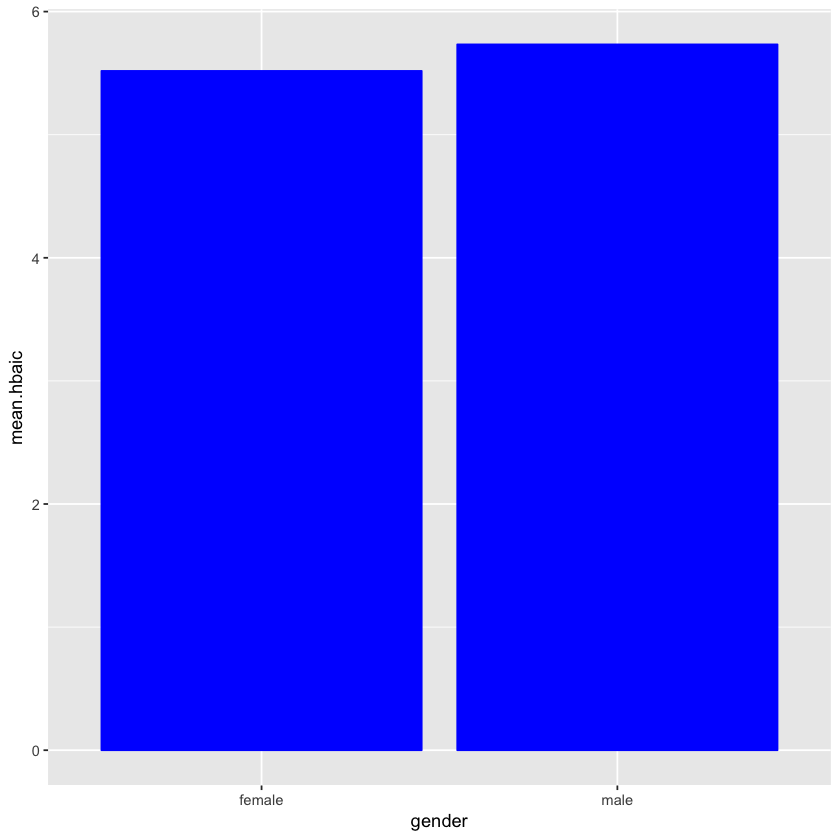

pdf 
  2

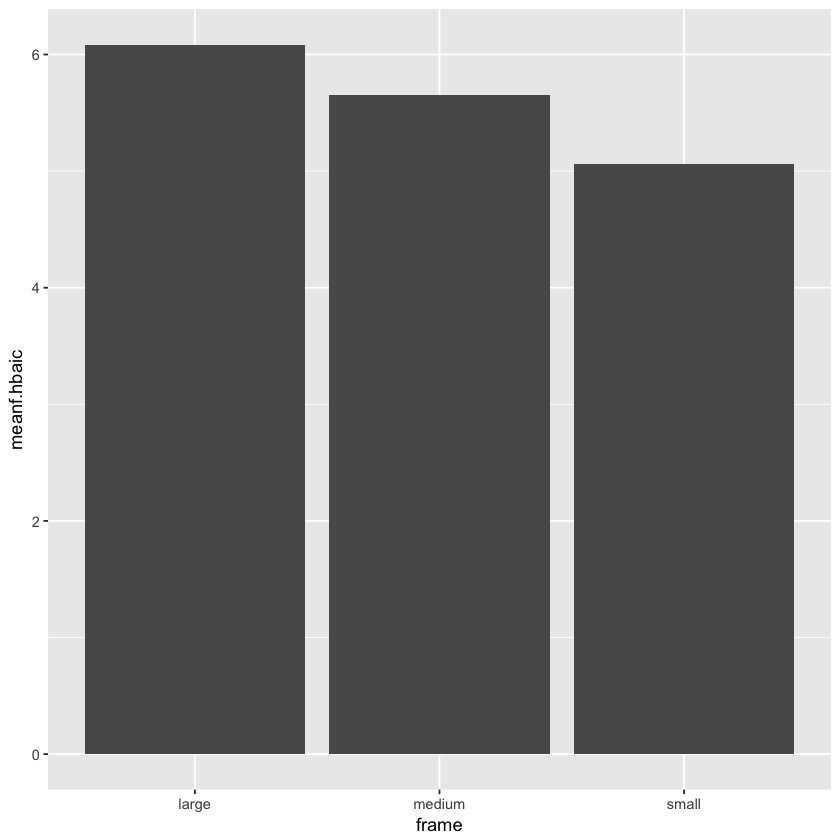

In [44]:
## We will now run some simple visualisations
# barplot for glycosylated haemoglobin

ggplot(glyc.sex) +
   geom_bar(aes(gender, mean.hbaic), stat = "identity", colour = "blue", fill = "blue")

## Let's make another graphic with glycosylated haemoglobin with frame argument
glyc.frame <- mydata1 %>% 
             group_by(frame) %>%
             summarize(meanf.hbaic = mean(glyhb, na.rm = T),
                       sdf.hbaic = sd(glyhb, na.rm = T))
ggplot(glyc.frame) +
  geom_bar(aes(frame, meanf.hbaic),
          stat = "identity")

## these are perhaps best described with boxplots

framebysex <- ggplot(mydata1) +
 geom_boxplot(aes(frame, glyhb)) +
 facet_wrap(~gender)

## How do we save our plots so that we can use it later for our projects?
# Here we save it as png graphics
png("boxplot.png")
framebysex
dev.off()

## Box plot of glycosylated haemoglobin by frame for male and female

![Boxplots](boxplot.png)


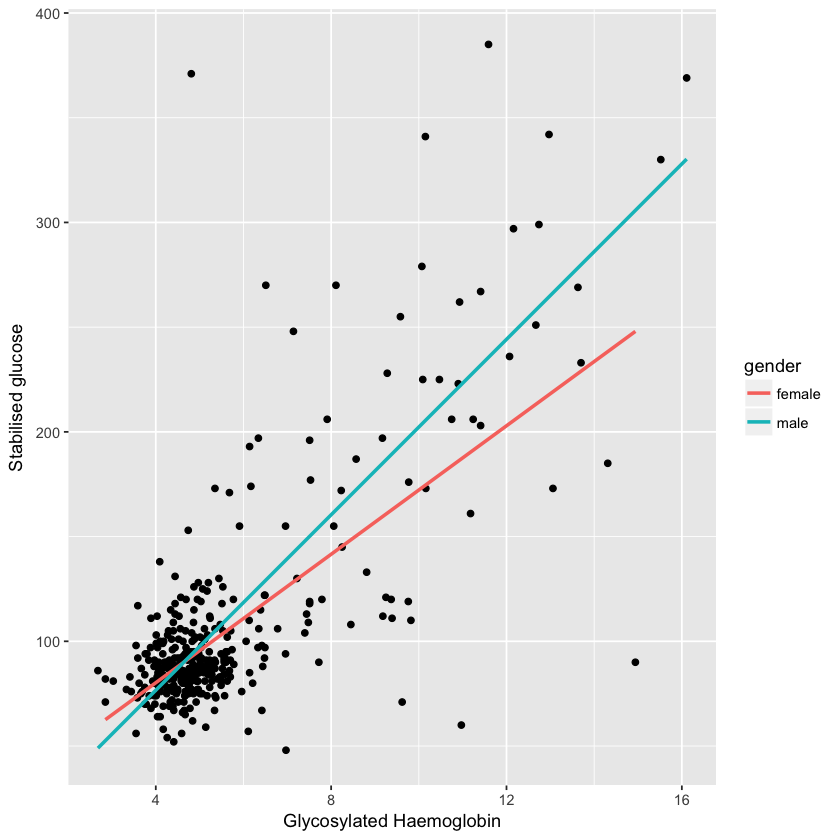

In [57]:
## What is the association between stabilised glucose (stab.glu) and glycosylated haemoglobin (glyhb)?
## Is it similar for males and females?

ggplot(mydata1) + # feed the data set
  geom_point(aes(glyhb, stab.glu)) + # trying to predict stabilised glucose with glyhb in x axis
  geom_smooth(aes(glyhb, stab.glu, group = gender, colour = gender), se = FALSE, 
             method = "lm") +
  ylab("Stabilised glucose") + 
  xlab("Glycosylated Haemoglobin")